### Normal Distribution:

In [75]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv("preProcessed_data.csv")

In [11]:
data

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

### Probability Density Function:

In [71]:
def get_pdf_probability(data,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(data,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = data
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=66.333, Standard Deviation=10.898
The area between range(60,90):0.7180298788589667


0.7180298788589667

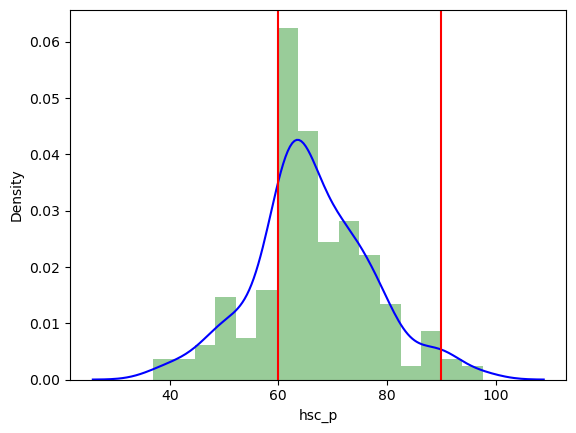

In [81]:
get_pdf_probability(data['hsc_p'],60,90)

In [21]:
#!pip install statsmodels

### Cumulative Density Frequency calculations:

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

Text(0.5, 1.0, 'SSC_P with KDE')

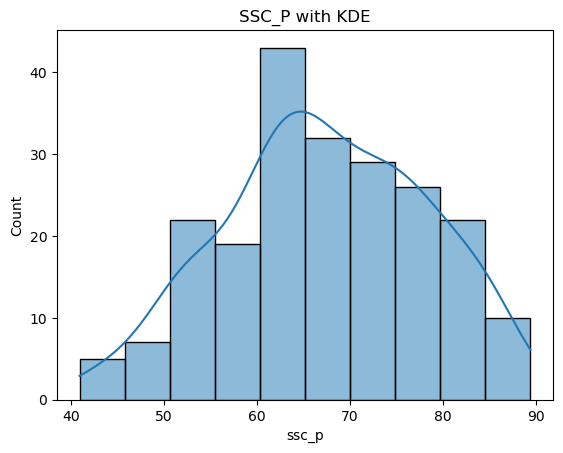

In [34]:
sns.histplot(data['ssc_p'],kde=True)
plt.title("SSC_P with KDE")

In [30]:
ecdf = ECDF(data['ssc_p'])
ecdf(75) # we can pass 1 to 100 to get the excat percentage from the distribution model.

0.7395348837209302

In [97]:
# Practice code on finding z-score

In [95]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Step 1: Create sample data
data = pd.DataFrame({
    'student_id': range(1, 11),
    'math_marks': [50, 55, 60, 65, 70, 75, 80, 85, 90, 150]  # 150 is a clear outlier
})

# Step 2: Calculate Z-scores
data['zscore'] = zscore(data['math_marks'])

# Step 3: Detect Outliers (Z > 3 or < -3)
data['outlier'] = data['zscore'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')

print(data)


   student_id  math_marks    zscore outlier
0           1          50 -1.039177  Normal
1           2          55 -0.853610  Normal
2           3          60 -0.668043  Normal
3           4          65 -0.482475  Normal
4           5          70 -0.296908  Normal
5           6          75 -0.111340  Normal
6           7          80  0.074227  Normal
7           8          85  0.259794  Normal
8           9          90  0.445362  Normal
9          10         150  2.672171  Normal
